# KNN(K-Nearest Neighbors) k 최근접 이웃

# KNN이란?

- 주변 K 개의 자료의 클래스 중 가장 많은 클래스로 특정 자료를 분류하는 방식
- 새로운 자료 ? 를 가장 가까운 5개의 자료(k=5)를 이용해 투표하여 가장 많은 클래스로 할당

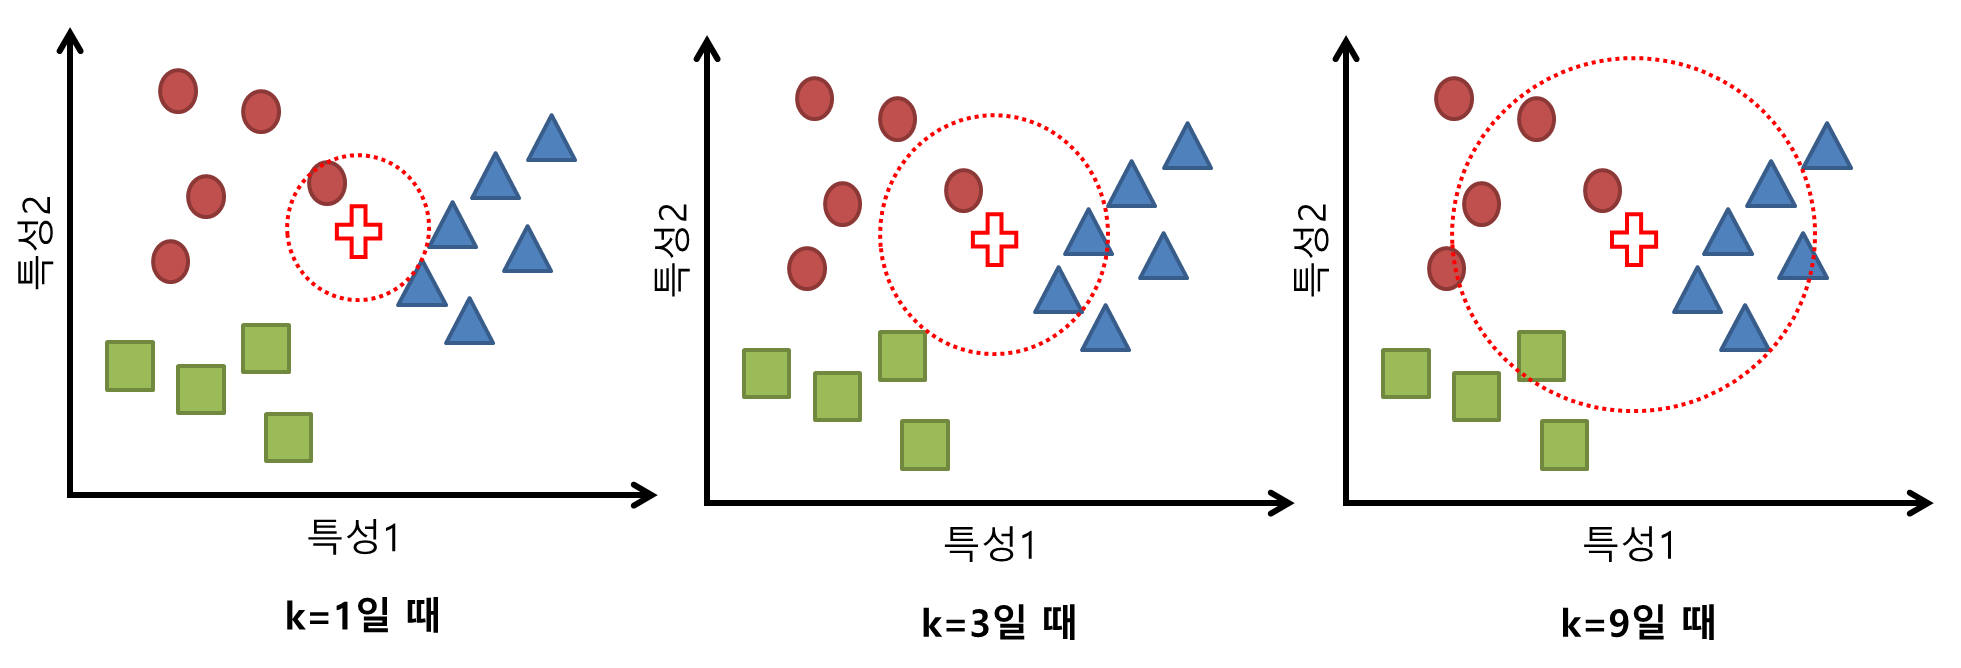



- Training-data 자체가 모형일 뿐 어떠한 추정 방법도 모형도 없음
- 즉 데이터의 분포를 표현하기 위한 파라미터를 추정하지 않음
- 매우 간단한 방법이지만 performance는 떨어지지 않음. 
- 게으른 학습(Lazy learner)또는 사례 중심 학습(instance-based learning) : 게으른 학습 :  알고리즘은 훈련데이터에서 판별함수를 학습하는대신 훈련데이터 셋을 메모리에 저장하는 방법
- 데이터의 차원이 증가하면 차원의 저주 문제가 발생
** 즉 KNN은 차원이 증가할 수록 성능 저하가 심함. 차원이 증가할수록 해당 공간의 크기(부피)가 기하급수적으로 증가해 동일한 개수의 데이터의 밀도는 급속도로 희박해진다. 

## KNN의 하이퍼파라미터

- 탐색할 이웃수(k)와 거리 측정 방법
-- k가 적을 경우 데이터의 지역적 특성을 지나치게 반영해 과적합 발생
-- 반대로 매우 클경우 모델이 과소적합 됨. 

## KNN의 k가 가지는 의미

1. 새로운 자료에 대해 근접치 k의 개수에 따라 group이 달리 분류
2. 가중 합 방식 : 가까운 이웃의 정보에 좀 더 가중치 부여

## KNN의 장단점

1. 장점
- 학습데이터 내에 끼어있는 노이즈의 영향을 크게 받지 않음
- 학습 데이터 수가 많다면 꽤 효과적인 알고리즘
- 마할라노비스 거리와 같이 데이터의 분산을 고려할 경우 매우 강건한 방법론

2. 단점
- 최적 이웃 수와 어떤 거리 척도가 분석에 적합한지 불분명해 데이터 각각의 특성에 맞게 연구자가 임의로 정해야함
- 새로운 관측치와 각각의 학습 데이터 사이의거리를 전부 측정해야하므로 계산시간이 오래 걸리는 한계



# 실습

In [ ]:
import seaborn as sns

iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


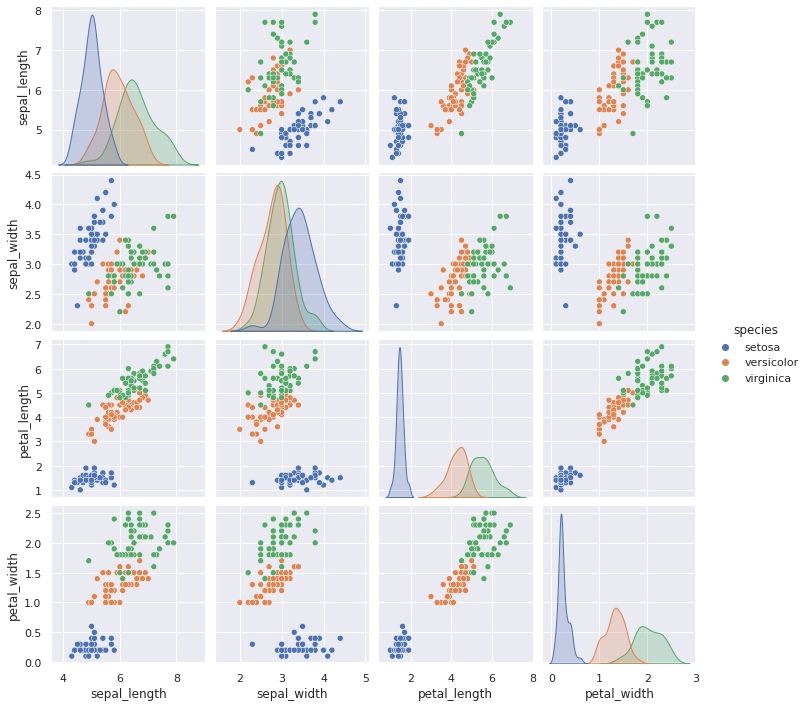

In [ ]:
import seaborn as sns

sns.set()
sns.pairplot(iris,hue='species')

In [ ]:
print(iris.shape) # iris data의 행과 열의 수

X = iris.drop('species', axis=1) # 'species'열을 drop하고 input X를 정의함.
print(X.shape)

y=iris['species']              

(150, 5)
(150, 4)


In [ ]:
iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoder=LabelEncoder()
y=encoder.fit_transform(iris['species'].values)
print('species labels:',np.unique(y))

species labels: [0 1 2]


In [ ]:
yo=encoder.inverse_transform(y) # 원래의 species 문자열로 전환
print('species:',np.unique(yo))

species: ['setosa' 'versicolor' 'virginica']


In [ ]:
#train,test 데이터로 나누기
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

print(X_train.head())
X_train_std[1:5,]

     sepal_length  sepal_width  petal_length  petal_width
33            5.5          4.2           1.4          0.2
20            5.4          3.4           1.7          0.2
115           6.4          3.2           5.3          2.3
124           6.7          3.3           5.7          2.1
35            5.0          3.2           1.2          0.2


array([[-0.55053619,  0.76918392, -1.16537974, -1.30728421],
       [ 0.65376173,  0.30368356,  0.84243039,  1.44587881],
       [ 1.0150511 ,  0.53643374,  1.0655204 ,  1.18367281],
       [-1.03225536,  0.30368356, -1.44424226, -1.30728421]])

In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5,p=2)#5개의 이접한 이웃, 거리 측정 기준 : 유클리드
knn.fit(X_train_std,y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred=knn.predict(X_train_std)
y_test_pred=knn.predict(X_test_std)
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인

Misclassified training samples: 4
Misclassified test samples: 3


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_test_pred))

0.9333333333333333


In [ ]:
from sklearn.metrics import confusion_matrix

conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred)
print(conf)
# setosa는 모두 정확하게 분류되었고 versicolor는 15개 중 2개가 virginica로 오분류 되었으며 virginica는 15개 중 1개가 versicolor로 오분류됨.

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]


setosa는 모두 정확하게 분류되었고 versicolor는 15개 중 2개가 virginica로 오분류 되었으며 virginica는 15개 중 1개가 versicolor로 오분류됨.

## confusion matrix

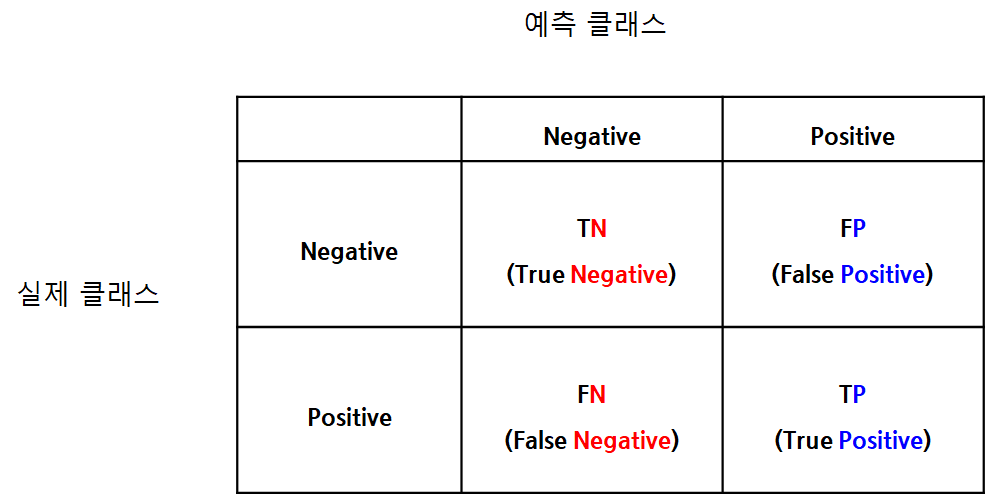

- `TN` : 예측값을 Negative 값 0으로 예측했고, 실제 값 역시 Negative 값 0.
- `FP` : 예측 값을 Positive 값 1로 예측했는데, 실제 값은 Negative 값 0.
- `FN` : 예측값을 Negative값 0으로 예측했는데 실제 값은 Positive 값 1.
- `TP` : 예측값을 positive 값 1로 예측했는데 실제 값 역시 Positive 값 1.

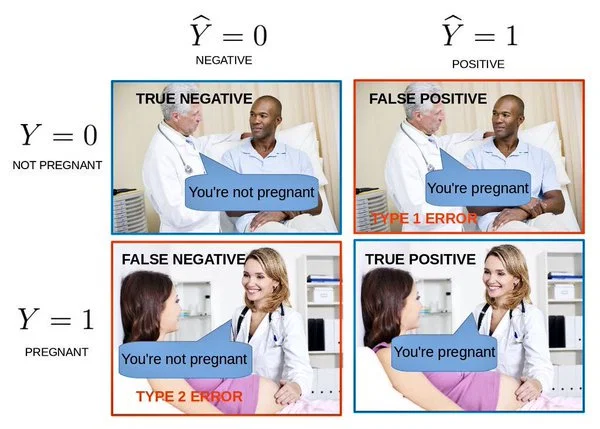

정확도(Accuracy)=예측 결과가 동일한 데이터 건수/전체 예측 데이터 건수

정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안된다. 정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러가지 분류 지표와 함게 사용해야한다. 

## 정밀도, 재현율, f1-score, 정확도를 한꺼번에 확인하는 방법

### 정밀도(precision)와 재현율(recall)

**정밀도**는 예측을 positive로 한 대상 중에서 예측과 실제 값이 positive로 일치한 데이터의 비율을 뜻한다. 

**재현율**은 실제 값이  positive인 대상 중에서 예측과 실제 값이  positive로 일치한 데이터의 비율을 뜻한다.

정밀도와 재현율 지표 중에 이진 분류 모델의 업무 특성에 따라서 특정 평가 지표가 더 중요한 지표로 간주될 수 있다. **재현율**이 중요 지표인 경우는 **실제 positive 양성 데이터를 negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다.** 

ex) 암 판단 모델일 경우 재현율이 훨씬 중요하다. 실제 positive인 암환자를 positive 양성이 아닌 negative 음성으로 잘못 판단했을 경우 오류의 대가가 생명을 앗아갈 정도로 심각하기 때문

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인

Misclassified training samples: 2
Misclassified test samples: 1


In [ ]:
from sklearn.metrics import accuracy_score    #정확도 계산을 위한 모듈 import
print(accuracy_score(y_test,y_test_pred)) # 45개 test sample중 42개가 정확하게 분류됨.

0.9777777777777777


In [ ]:
from sklearn.metrics import confusion_matrix#  오분류표 작성을 위한 모듈 import
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.
print(conf)

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


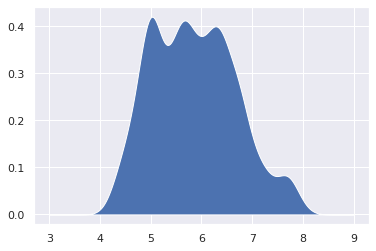

In [ ]:
# Kernel density
import matplotlib.pyplot as plt 
import numpy as np   

xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape

from sklearn.neighbors import KernelDensity

kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
plt.fill_between(xx_d, np.exp(logprob))